# Programming with Python
## Graded Project - 2

### Marketing Data Analysis

In [1]:
# Importing required libraries for given data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

# 1

#### Loading Market Dataset

In [2]:
# Importing Market data 
df = pd.read_csv('marketing_data.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


**Displaying 5 random samples**

In [3]:
df.sample(5) # Collecting 5 Random samples of data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1115,10250,1947,Basic,Together,"$28,389.00",0,0,11/20/12,49,1,...,2,7,0,0,0,0,0,0,0,SP
1923,6049,1982,Master,Together,"$73,450.00",0,0,12/5/13,85,1142,...,11,3,1,0,0,1,0,0,0,SP
2104,6988,1986,Graduation,Married,"$71,952.00",1,0,1/10/13,93,656,...,8,4,1,0,1,0,0,0,0,AUS
947,1340,1986,Graduation,Married,"$92,910.00",0,0,4/24/14,42,551,...,13,1,0,1,1,1,0,0,0,SP
1995,8132,1975,PhD,Married,"$60,631.00",1,1,4/5/13,88,565,...,8,7,0,1,0,0,0,0,0,GER


**Getting Info about Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# Checking for duplicate values
len(df[df.duplicated()])

0

### Views
- Given Market data has 2240 entries with 28 columns
- (Education,Marital_Status,Income,Dt_Customer,Country) are the 5 columns which are object typre remaining 23 columns are in  ***int*** data type
- Income is the only column with null values
- Income need to be convert into ***int*** datatype 
- Dt_Customer has to be converted into datetime format
- We don't have any duplicate values

# 2

### Statistics of dataset

In [6]:
# Statistical Summary of data
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Statistical summery of categorical data
df.describe(include = 'O')

,Education,Marital_Status,Income,Dt_Customer,Country
count,2240,2240,2216,2240,2240
unique,5,8,1974,663,8
top,Graduation,Married,"$7,500.00",8/31/12,SP
freq,1127,864,12,12,1095


**Varaiance of dataset**

In [8]:
df.var()

ID                     1.054082e+07
Year_Birth             1.436179e+02
Kidhome                2.898725e-01
Teenhome               2.965219e-01
Recency                8.388237e+02
MntWines               1.132978e+05
MntFruits              1.581926e+03
MntMeatProducts        5.094743e+04
MntFishProducts        2.984325e+03
MntSweetProducts       1.704080e+03
MntGoldProds           2.721442e+03
NumDealsPurchases      3.733542e+00
NumWebPurchases        7.721252e+00
NumCatalogPurchases    8.544517e+00
NumStorePurchases      1.056873e+01
NumWebVisitsMonth      5.888606e+00
AcceptedCmp3           6.750283e-02
AcceptedCmp4           6.902615e-02
AcceptedCmp5           6.750283e-02
AcceptedCmp1           6.017993e-02
AcceptedCmp2           1.321939e-02
Response               1.269309e-01
Complain               9.291257e-03
dtype: float64

**50% of data lies at**

In [9]:
df.quantile(q = 0.5)

ID                     5458.5
Year_Birth             1970.0
Kidhome                   0.0
Teenhome                  0.0
Recency                  49.0
MntWines                173.5
MntFruits                 8.0
MntMeatProducts          67.0
MntFishProducts          12.0
MntSweetProducts          8.0
MntGoldProds             24.0
NumDealsPurchases         2.0
NumWebPurchases           4.0
NumCatalogPurchases       2.0
NumStorePurchases         5.0
NumWebVisitsMonth         6.0
AcceptedCmp3              0.0
AcceptedCmp4              0.0
AcceptedCmp5              0.0
AcceptedCmp1              0.0
AcceptedCmp2              0.0
Response                  0.0
Complain                  0.0
Name: 0.5, dtype: float64

**Lower quarter of the data**

In [10]:
df.quantile(q = 0.25)

ID                     2828.25
Year_Birth             1959.00
Kidhome                   0.00
Teenhome                  0.00
Recency                  24.00
MntWines                 23.75
MntFruits                 1.00
MntMeatProducts          16.00
MntFishProducts           3.00
MntSweetProducts          1.00
MntGoldProds              9.00
NumDealsPurchases         1.00
NumWebPurchases           2.00
NumCatalogPurchases       0.00
NumStorePurchases         3.00
NumWebVisitsMonth         3.00
AcceptedCmp3              0.00
AcceptedCmp4              0.00
AcceptedCmp5              0.00
AcceptedCmp1              0.00
AcceptedCmp2              0.00
Response                  0.00
Complain                  0.00
Name: 0.25, dtype: float64

**Midddle of the data**

In [11]:
df.quantile(q = 0.5)

ID                     5458.5
Year_Birth             1970.0
Kidhome                   0.0
Teenhome                  0.0
Recency                  49.0
MntWines                173.5
MntFruits                 8.0
MntMeatProducts          67.0
MntFishProducts          12.0
MntSweetProducts          8.0
MntGoldProds             24.0
NumDealsPurchases         2.0
NumWebPurchases           4.0
NumCatalogPurchases       2.0
NumStorePurchases         5.0
NumWebVisitsMonth         6.0
AcceptedCmp3              0.0
AcceptedCmp4              0.0
AcceptedCmp5              0.0
AcceptedCmp1              0.0
AcceptedCmp2              0.0
Response                  0.0
Complain                  0.0
Name: 0.5, dtype: float64

**Upper quarter of the data**

In [12]:
df.quantile(q = 0.75)

ID                     8427.75
Year_Birth             1977.00
Kidhome                   1.00
Teenhome                  1.00
Recency                  74.00
MntWines                504.25
MntFruits                33.00
MntMeatProducts         232.00
MntFishProducts          50.00
MntSweetProducts         33.00
MntGoldProds             56.00
NumDealsPurchases         3.00
NumWebPurchases           6.00
NumCatalogPurchases       4.00
NumStorePurchases         8.00
NumWebVisitsMonth         7.00
AcceptedCmp3              0.00
AcceptedCmp4              0.00
AcceptedCmp5              0.00
AcceptedCmp1              0.00
AcceptedCmp2              0.00
Response                  0.00
Complain                  0.00
Name: 0.75, dtype: float64

# 3

**Finding Missing Values**

In [13]:
df.isna().sum() #isna() gives boolean data of missing values and sum() to count number of missing values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [14]:
# Renaming the Income column (Income column name has extra space)
df = df.rename(columns = {' Income ':'Income'})

Only Income has 24 missing values

In [15]:
# Checking for which values are considering null
df_null = pd.DataFrame({'value' : df['Income'], 'Missing?' : df['Income'].isnull()}) 
df_null[df_null['Missing?']==True]

,value,Missing?
134,NaN,True
262,NaN,True
394,NaN,True
449,NaN,True
525,NaN,True
590,NaN,True
899,NaN,True
997,NaN,True
1096,NaN,True
1185,NaN,True


### Views
- only NaN values are considered as a missing values
- for impute null values we need to remove extra charachters from the **Income** column.
- Then we fill the null values with 'median' 

# 4

### Removing extra special characters

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


- Income Column have an extra symbol('$'). And column must be converted to int instead of object data type
- Dt_Customer column should convert into datetime type

In [17]:
df['Income'] = df['Income'].str.replace('$','') # Replacing '$' with ''
df['Income'] = df['Income'].str.replace(',','') # Replacing ',' with ''
df['Income'] = df['Income'].str.replace('.00','') # replacing '.00' with ''

# NaN values itself considering as a float type 
# So, We convert notnull values into int data type 
df.loc[df['Income'].notnull(),'Income'] = df.loc[df['Income'].notnull(),'Income'].apply(int) 

**Imputing null values with the median value of the Income Column**
(Relate to 3 Question)

In [18]:
df['Income'] = df['Income'].fillna(df['Income'].median()).astype(int)

In [19]:
df['Income'].isna().sum() # Confirming null values

0

In [20]:
df.dtypes['Income'] # Confirming Data type of income column

dtype('int32')

**Converting Dt_Customer datatype**

In [21]:
df.dtypes['Dt_Customer'] # Finding Dt_Customer datatype. 

dtype('O')

In [22]:
#Converting object data type to datatime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [23]:
df['Dt_Customer'] 

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

# 5

### Finding Age of the Customers

In [24]:
# Creating Age column with the age of customer( current age = 2022 - 'Year_Birth')
df['Age'] = 2022 - df['Year_Birth']

In [25]:
# Displaying Age and Birth year of Customers
df[['ID','Year_Birth','Age']]

,ID,Year_Birth,Age
0,1826,1970,52
1,1,1961,61
2,10476,1958,64
3,1386,1967,55
4,5371,1989,33
...,...,...,...
2235,10142,1976,46
2236,5263,1977,45
2237,22,1976,46
2238,528,1978,44


**Statistical summery of the Age**

In [26]:
df['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

**Views**
- The youngest customer in the data with the age of 26 years
- The eldest customer in the data with the age of 129 years
- 50 % of the customers are less than 52 years old

# 6

### Analysing the expenditure of customers on various products

In [27]:
# Creating a new column with total amount spent on various products
df['Total_Amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [28]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_Amount
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,52,1190
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,61,577
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,64,251
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,55,11
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,33,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,0,US,46,689
2236,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,0,SP,45,55
2237,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,0,SP,46,309
2238,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,0,IND,44,1383


In [29]:
# Total_Amount with various products for each customer
df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','Total_Amount']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Amount
0,189,104,379,111,189,218,1190
1,464,5,64,7,0,37,577
2,134,11,59,15,2,30,251
3,10,0,1,0,0,0,11
4,6,16,24,11,0,34,91
...,...,...,...,...,...,...,...
2235,372,18,126,47,48,78,689
2236,5,10,13,3,8,16,55
2237,185,2,88,15,5,14,309
2238,267,38,701,149,165,63,1383


**Finding how much percentage of money spent on various products by each customer** 

In [30]:
# finding percentage of each products with the total_amount
wines = (df['MntWines'] / df['Total_Amount']) * 100
fruits = (df['MntFruits'] / df['Total_Amount']) * 100
meat = (df['MntMeatProducts'] / df['Total_Amount']) * 100
fish = (df['MntFishProducts'] / df['Total_Amount']) * 100
sweet = (df['MntSweetProducts'] / df['Total_Amount']) * 100
gold = (df['MntGoldProds'] / df['Total_Amount']) * 100
total = (df['Total_Amount']/df['Income']) * 100

In [31]:
# Creating data frame for percentage of money spent on various products
wines_df = wines.to_frame(name = 'wines')
fruits_df = fruits.to_frame(name = 'fruits')
meat_df = meat.to_frame(name = 'meat')
fish_df = fish.to_frame(name = 'fish')
sweet_df = sweet.to_frame(name = 'sweet')
gold_df = wines.to_frame(name = 'gold')
total_df = total.to_frame(name = 'total')

In [32]:
df2 = pd.concat([df['Total_Amount'],wines_df,fruits_df,meat_df,fish_df,sweet_df,gold_df],axis = 1)

In [33]:
df2

,Total_Amount,wines,fruits,meat,fish,sweet,gold
0,1190,15.882353,8.739496,31.848739,9.327731,15.882353,15.882353
1,577,80.415945,0.866551,11.091854,1.213172,0.000000,80.415945
2,251,53.386454,4.382470,23.505976,5.976096,0.796813,53.386454
3,11,90.909091,0.000000,9.090909,0.000000,0.000000,90.909091
4,91,6.593407,17.582418,26.373626,12.087912,0.000000,6.593407
...,...,...,...,...,...,...,...
2235,689,53.991292,2.612482,18.287373,6.821480,6.966618,53.991292
2236,55,9.090909,18.181818,23.636364,5.454545,14.545455,9.090909
2237,309,59.870550,0.647249,28.478964,4.854369,1.618123,59.870550
2238,1383,19.305857,2.747650,50.686913,10.773680,11.930586,19.305857


**Finding how much percentage of money spent on each products by all customers** 

In [34]:
# Total amount of spend by all customers 
total_spend = df['Total_Amount'].sum()

In [35]:
# Finding how much percentage spent on various products
total_wineMnt = (df['MntWines'].sum()/total_spend)*100
total_fruitsMnt = (df['MntFruits'].sum()/total_spend)*100
total_meatMnt = (df['MntMeatProducts'].sum()/total_spend)*100
total_fishMnt = (df['MntFishProducts'].sum()/total_spend)*100
total_sweetMnt = (df['MntSweetProducts'].sum()/total_spend)*100
total_goldMnt = (df['MntGoldProds'].sum()/total_spend)*100
indexs = ['Wines','Fruits','Meatproducts','FishProducts','Sweets',' Gold']

In [36]:
#creating separate series for Amount spent on various products
df3 = pd.Series([total_wineMnt,total_fruitsMnt,total_meatMnt,total_fishMnt,total_sweetMnt,total_goldMnt],index=indexs)

In [37]:
df3.to_frame(name = 'Percentage of amount spent')

,Percentage of amount spent
Wines,50.171114
Fruits,4.341748
Meatproducts,27.558681
FishProducts,6.194380
Sweets,4.467320
Gold,7.266755


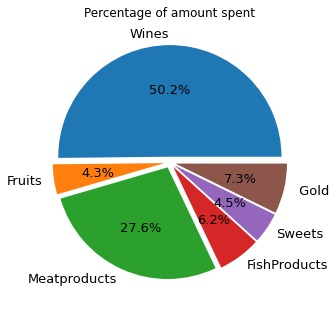

In [38]:
# pie chart on percentage of amount spent on various products
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
ax = df3.plot.pie(autopct='%1.1f%%',explode = explode,
         figsize = (5,13),title = 'Percentage of amount spent',fontsize = 13)
ax.set_ylabel(None)
plt.show()

### Views
- Wine is the product where most people spent their money on it.
- Less amount of money spent on fruits by the customers

# 7

### Analysing the different purchasing mediums

In [39]:
# Displaying various medium of purchases
df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1,4,4,6
1,1,7,3,7
2,1,3,2,5
3,1,1,0,2
4,2,3,1,2
...,...,...,...,...
2235,2,5,2,11
2236,1,1,0,3
2237,2,6,1,5
2238,1,5,4,10


**Total amount of purchases done by customers through different mediums**

In [40]:
# Creating a new column with Total purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [41]:
df[['ID','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','Total_Purchases']]

,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases
0,1826,1,4,4,6,15
1,1,1,7,3,7,18
2,10476,1,3,2,5,11
3,1386,1,1,0,2,4
4,5371,2,3,1,2,8
...,...,...,...,...,...,...
2235,10142,2,5,2,11,20
2236,5263,1,1,0,3,5
2237,22,2,6,1,5,14
2238,528,1,5,4,10,20


**Finding contribution of each channel to the total purchases**

In [42]:
# Summing total purchases done through different channels
NumDeals = df['NumDealsPurchases'].sum()
NumWeb = df['NumWebPurchases'].sum()
NumCatalog = df['NumCatalogPurchases'].sum()
NumStore = df['NumStorePurchases'].sum()
channels = [NumDeals,NumWeb,NumCatalog,NumStore]
channel_index = ['DealPurchases','WebPurchases','CatalogPurchases','StorePurchases']

In [43]:
df4 = pd.Series(channels,index = channel_index)
df4.to_frame(name = 'TotalNumPurchases')

,TotalNumPurchases
DealPurchases,5208
WebPurchases,9150
CatalogPurchases,5963
StorePurchases,12970


In [44]:
# Sum of total purchases
SumTotalPurchases = df['Total_Purchases'].sum()

In [45]:
# Finding percentage of different channels to the total purchases
Dealpercent = (NumDeals/SumTotalPurchases)*100
Webpercent = (NumWeb/SumTotalPurchases)*100
Catalogpercent = (NumCatalog/SumTotalPurchases)*100
Storepercent = (NumStore/SumTotalPurchases)*100
Channel_percent = [Dealpercent,Webpercent,Catalogpercent,Storepercent]

In [46]:
#creating separate series for different channels
df5 = pd.Series(Channel_percent,index = channel_index)
df5.to_frame(name = 'Percentage of Purchases')

,Percentage of Purchases
DealPurchases,15.643868
WebPurchases,27.484906
CatalogPurchases,17.911748
StorePurchases,38.959479


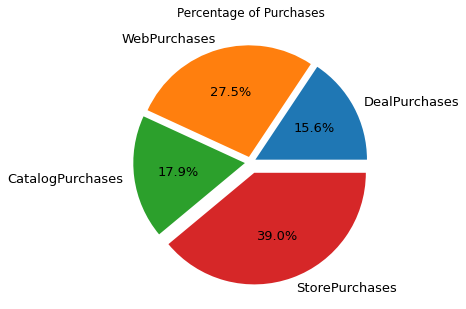

In [47]:
# Pie chart on total purchases
explode = (0.05,0.05,0.05,0.1)
ax1 = df5.plot.pie(autopct='%1.1f%%',explode = explode,
         figsize = (5,13),title = 'Percentage of Purchases',fontsize = 13)
ax1.set_ylabel(None)
plt.show()

### Views
- Most people are like to by products on stores
- Later, Web is the channel where most people by products

# 8

### Analysing Compaigns

In [48]:
# Displaying various campaigns done
df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,0,0
2237,0,0,0,0,0
2238,0,0,0,0,0


For finding sucessful campaigns we need to sum the peoples who like the offers in particular campaigns

In [49]:
cmp1 = df['AcceptedCmp1'].sum()
cmp2 = df['AcceptedCmp2'].sum()
cmp3 = df['AcceptedCmp3'].sum()
cmp4 = df['AcceptedCmp4'].sum()
cmp5 = df['AcceptedCmp5'].sum()
cmp_list = [cmp1,cmp2,cmp3,cmp4,cmp5]
cmp_index = ['Camp1','Camp2','Camp3','Camp4','Camp5']

In [50]:
#creating separate series for campaigns
cmp_series = pd.Series(cmp_list,index = cmp_index)

In [51]:
# Campaign dataframe
camp_df = cmp_series.to_frame(name = 'Offer Accepted by')
camp_df

,Offer Accepted by
Camp1,144
Camp2,30
Camp3,163
Camp4,167
Camp5,163


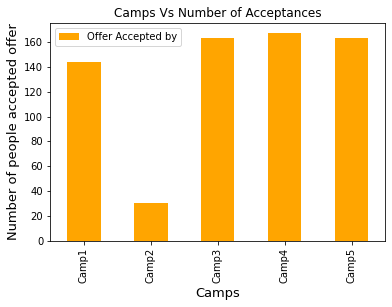

In [52]:
# Using bar chat to display number of offfer acceptances in each campaigns
ax = camp_df.plot.bar(color = 'orange')
ax.set_xlabel('Camps',fontsize = 13)
ax.set_ylabel('Number of people accepted offer',fontsize = 13)
ax.set_title('Camps Vs Number of Acceptances')
plt.show()

### Views
- Campaign 4 is the most successful campaign with 167 offer acceptancy
- Later, Camp 3 and 5 with 163 offer acceptancy
- Campaign 2 is disastered with only 30 offer acceptancy

# 9

### Analysing revenue generated by various products

In [53]:
# Displaying different products
df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,189,104,379,111,189,218
1,464,5,64,7,0,37
2,134,11,59,15,2,30
3,10,0,1,0,0,0
4,6,16,24,11,0,34
...,...,...,...,...,...,...
2235,372,18,126,47,48,78
2236,5,10,13,3,8,16
2237,185,2,88,15,5,14
2238,267,38,701,149,165,63


In [54]:
#Summing each products revenue 
rev_wines = df['MntWines'].sum()
rev_fruits = df['MntFruits'].sum()
rev_meatprod = df['MntMeatProducts'].sum()
rev_fishprod = df['MntFishProducts'].sum()
rev_sweets = df['MntSweetProducts'].sum()
rev_gold = df['MntGoldProds'].sum()
rev_list = [rev_wines,rev_fruits,rev_meatprod,rev_fishprod,rev_sweets,rev_gold]
rev_index = ['Wines','Fruits','Meat','Fish','Sweets','Gold']

In [55]:
#creating separate series for revenue
rev_series = pd.Series(rev_list,index = rev_index)

In [56]:
# Creating dataframe for rev_series
rev_df = rev_series.to_frame(name = 'total_revenue')
rev_df

,total_revenue
Wines,680816
Fruits,58917
Meat,373968
Fish,84057
Sweets,60621
Gold,98609


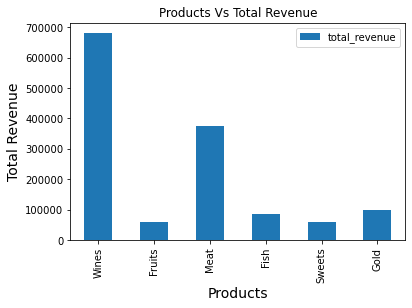

In [57]:
# Plotting bar chart to visualize the total revenue generated by each products
ax = rev_df.plot.bar()
ax.set_xlabel('Products',fontsize = 14)
ax.set_ylabel('Total Revenue',fontsize = 14)
ax.set_title('Products Vs Total Revenue')
plt.show()

### Views
- Wines is the product which generate most revenue
- meat takes next place for revenue genration
- Fruits is the one which generates minimum revenue

# 10

### Analysing Age and Response of customer in last campaign

In [58]:
#creating seperate dataframe for age and responses
Res_df = df[['Age','Response']]
Res_df

,Age,Response
0,52,1
1,61,1
2,64,0
3,55,0
4,33,1
...,...,...
2235,46,0
2236,45,0
2237,46,0
2238,44,0


In [59]:
# Separate dataframe for people who accepted offer(Response = 1)
accep_df = Res_df[Res_df['Response'] == 1]
accep_df

,Age,Response
0,52,1
1,61,1
4,33,1
5,64,1
6,68,1
...,...,...
2195,55,1
2196,55,1
2212,39,1
2216,62,1


**Age Vs Who Accept offer**

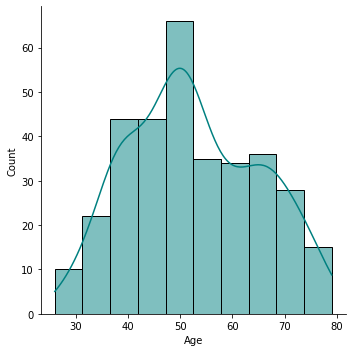

In [60]:
#Plotting displot for Age who accept the offer
ax = sn.displot(accep_df['Age'],color = 'Teal',kde = True)

### Views 
- Peoples who have age around 48 to 53 give more responses in last campaign

In [61]:
# Grouping Responses by age of the customers
age_group = df.groupby(by = 'Age')['Response']
nres = age_group.sum()      # Sum of the number of responses
re_df = nres.to_frame(name = 'nres')

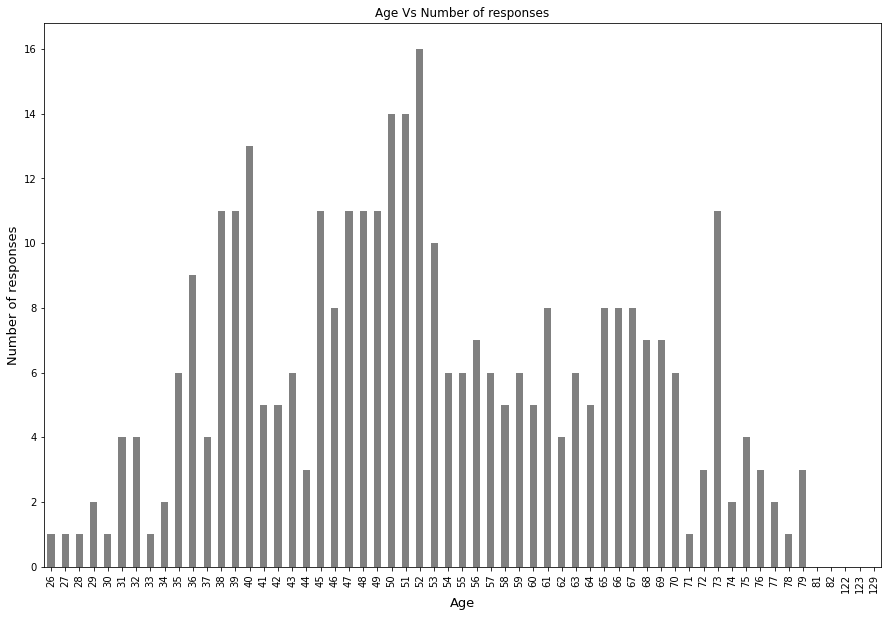

In [62]:
# Bar plot to visualize Age Vs Number of responses
plt.figure(figsize = (15,10))
ax = nres.plot.bar(color = 'Grey')
ax.set_xlabel('Age',fontsize = 13)
ax.set_ylabel('Number of responses',fontsize = 13)
ax.set_title('Age Vs Number of responses')
plt.show()

### Views
- More responses given by people who has age 52(total 16 responses)

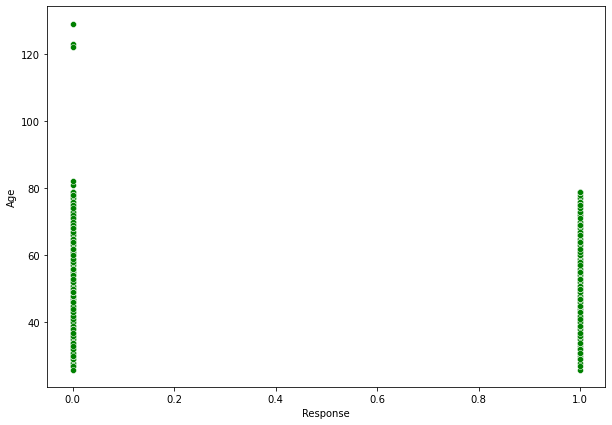

In [63]:
# Scatter plot to visualize the Response vs Age
plt.figure(figsize = (10,7))
sn.scatterplot(df['Response'],df['Age'],color = 'green')
plt.show()

### Views
- In Response Vs Age, There is no any particular pattern mostly people with same age groups accept offer and also reject offer

# 11

### Analysing Response with the country

In [64]:
df[['Response','Country']]

,Response,Country
0,1,SP
1,1,CA
2,0,US
3,0,AUS
4,1,SP
...,...,...
2235,0,US
2236,0,SP
2237,0,SP
2238,0,IND


In [65]:
# Grouping country with the response
country_response = df.groupby(by = 'Country')['Response']

In [66]:
#Summing responses with respect to country
responses = country_response.sum()

In [67]:
res_df = responses.to_frame(name = 'Responses')
res_df

,Responses
Country,
AUS,23
CA,38
GER,17
IND,13
ME,2
SA,52
SP,176
US,13


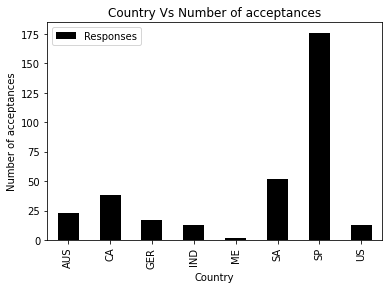

In [68]:
# Plotting bar chart to visualize the Response with respect to country
ax = res_df.plot(kind = 'bar',color = 'black',title = 'Country Vs Number of acceptances')
ax.set_ylabel('Number of acceptances')
plt.show()

### Views
- 'SP' is the country where most people accept the last campaign offer
- 'ME' is the country which less offer acceptancy in last campaign

# 12

### Analysing relation between Dependents and total amount spent and total purchases

***Dependents = Kidhome + Teenhome***

In [69]:
df[['Total_Amount','Kidhome','Teenhome']]

,Total_Amount,Kidhome,Teenhome
0,1190,0,0
1,577,0,0
2,251,0,1
3,11,1,1
4,91,1,0
...,...,...,...
2235,689,0,1
2236,55,1,0
2237,309,1,0
2238,1383,0,0


In [70]:
# Creating dependents dataframe
dependent = df['Kidhome'] + df['Teenhome']
dependents = dependent.to_frame(name = 'Dependents')
dependents

,Dependents
0,0
1,0
2,1
3,2
4,1
...,...
2235,1
2236,1
2237,1
2238,0


In [71]:
# Concate dependents and total amount spent
spent_df = pd.concat([df['Total_Amount'],dependents],axis = 1)
spent_df

,Total_Amount,Dependents
0,1190,0
1,577,0
2,251,1
3,11,2
4,91,1
...,...,...
2235,689,1
2236,55,1
2237,309,1
2238,1383,0


In [72]:
# Grouping Total amount by dependents 
dep_group = spent_df.groupby(by = 'Dependents')['Total_Amount']

In [73]:
#Summing total amount by dependents
total_sum = dep_group.sum()

In [74]:
dep_df = total_sum.to_frame(name = 'Total') # Creating dependent dataframe

In [75]:
dep_df

,Total
Dependents,
0,705647
1,533243
2,103544
3,14554


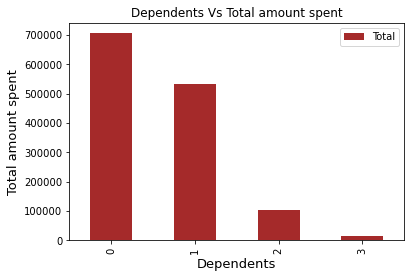

In [76]:
# Bar plot to visualize the dependents vs total amount 
ax = dep_df.plot(kind = 'bar', color = 'brown',title = 'Dependents Vs Total amount spent')
ax.set_ylabel('Total amount spent',fontsize  = 13)
ax.set_xlabel('Dependents',fontsize = 13)
plt.show()

### Views
- People who have **0** dependents spent most money on products
- Peoples with **3** dependents spent less money on products

**Finding total purchases with respect to dependents**

In [77]:
# Creating dataframe with total purchases and dependents
purchases_df = pd.concat([df['Total_Purchases'],dependents],axis = 1)
purchases_df

,Total_Purchases,Dependents
0,15,0
1,18,0
2,11,1
3,4,2
4,8,1
...,...,...
2235,20,1
2236,5,1
2237,14,1
2238,20,0


In [78]:
# Grouping Total purchases by Dependents
purchase_group = purchases_df.groupby(by = 'Dependents')['Total_Purchases']

In [79]:
# Summing number of purchases with dependents
purchase_df = purchase_group.sum().to_frame(name = 'Npurchases')
purchase_df

,Npurchases
Dependents,
0,11201
1,16334
2,5137
3,619


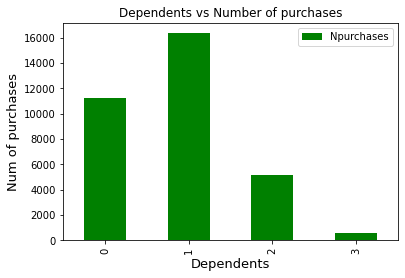

In [80]:
# Bar plot to visualize the Dependents vs Number of purchases
ax = purchase_df.plot(kind='bar',color = 'green')
ax.set_xlabel('Dependents',fontsize = 13)
ax.set_ylabel('Num of purchases',fontsize = 13)
ax.set_title('Dependents vs Number of purchases')
plt.show()

### Views
- People with 1 dependent made more purchases
- peoplw with 3 dependents made less purchases

# 13

### Correlation analysis

In [81]:
df.corr() # corr() gives correlation matrix for the data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Total_Amount,Total_Purchases
ID,1.000000,0.000028,0.008441,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,-0.021968,0.033883,-0.000028,-0.018054,-0.023834
Year_Birth,0.000028,1.000000,-0.152049,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.061774,-0.060510,0.007123,-0.005930,-0.006539,0.021325,-0.030128,-1.000000,-0.111306,-0.168304
Income,0.008441,-0.152049,1.000000,-0.386325,0.030732,0.007828,0.524814,0.394071,0.532721,0.410228,...,-0.012673,0.181845,0.291812,0.233436,0.090220,0.113896,-0.027187,0.152049,0.608406,0.522006
Kidhome,0.002406,0.230176,-0.386325,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,-0.080008,0.040207,-0.230176,-0.556669,-0.477895
Teenhome,-0.002580,-0.352111,0.030732,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,-0.154446,0.003138,0.352111,-0.138384,0.133163
Recency,-0.046524,-0.019871,0.007828,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.032991,0.018826,0.000129,-0.019283,-0.001781,-0.198437,0.013231,0.019871,0.020433,0.005740
MntWines,-0.022878,-0.157773,0.524814,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.062202,0.373286,0.472613,0.354133,0.205907,0.247254,-0.039007,0.157773,0.891839,0.712789
MntFruits,0.004600,-0.017917,0.394071,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.014727,0.010152,0.215833,0.194748,-0.009773,0.125289,-0.005166,0.017917,0.614229,0.455461
MntMeatProducts,-0.004437,-0.030872,0.532721,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.018272,0.102912,0.373769,0.309761,0.043033,0.236335,-0.023483,0.030872,0.842965,0.554229
MntFishProducts,-0.024475,-0.041625,0.410228,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.000357,0.016843,0.199578,0.260762,0.002577,0.111331,-0.020953,0.041625,0.642818,0.469454


**We display correlation analysis visually using Heatmap**

<AxesSubplot:>

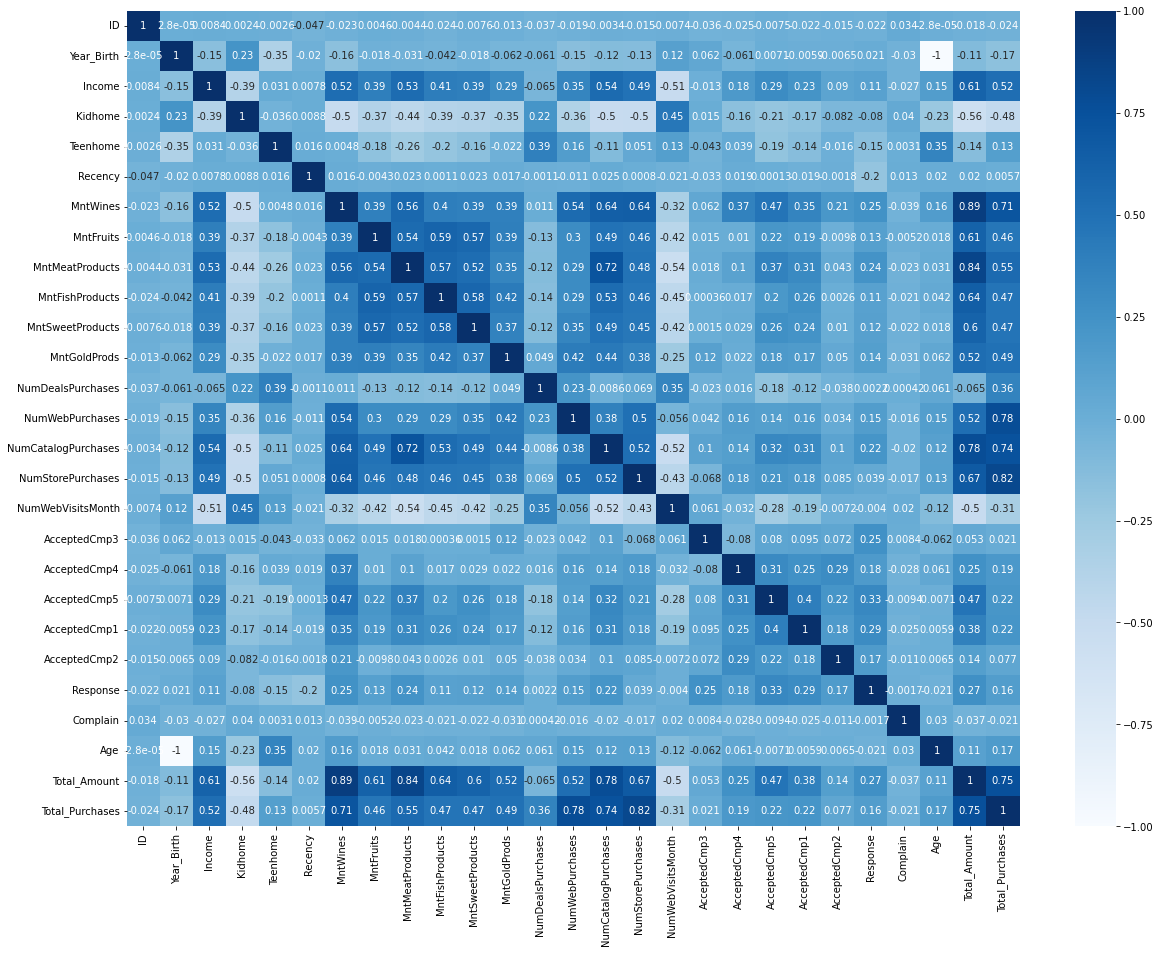

In [82]:
# Visualizing the correlation using heatmap
plt.figure(figsize = (20,15))
sn.heatmap(df.corr(),annot = True,cmap = 'Blues')

### Views
- Total amount have a strong correlation with the amount of wine sales. which is positively correlated.
- Total amount have positive correlation with meat products,fruits,sweet and gold respectively
- catalog purchases are mostly contribute the total amount later store and web purchases
- Store purchases are positively highly corellated with total purchases
- age doesn't have much corellation
- amount wine is negatively correlated to kids in home(-0.5)


# 14

### Analysing complains with respect to Educational background

In [83]:
#Displaying Educational and Complain 
df[['Education','Complain']]

,Education,Complain
0,Graduation,0
1,Graduation,0
2,Graduation,0
3,Graduation,0
4,Graduation,0
...,...,...
2235,PhD,0
2236,2n Cycle,0
2237,Graduation,0
2238,Graduation,0


In [84]:
# Grouping Complain by Education
Ed_group = df.groupby(by = 'Education')['Complain']

In [85]:
#Summing Number of complains 
Ed_df = Ed_group.sum().to_frame(name = 'Ncomplains')
Ed_df

,Ncomplains
Education,
2n Cycle,4
Basic,0
Graduation,14
Master,2
PhD,1


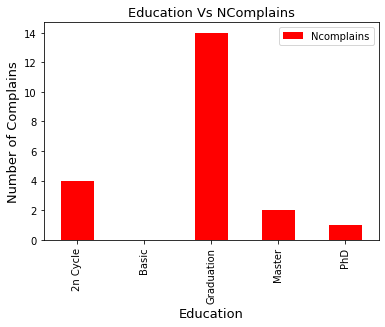

In [86]:
# Bar plot to visualizing the education vs number of complains
ax = Ed_df.plot(kind = 'bar',color = 'Red')
ax.set_xlabel('Education',fontsize = 13)
ax.set_ylabel('Number of Complains',fontsize = 13)
ax.set_title('Education Vs NComplains',fontsize = 13)
plt.show()

### Views 
- Most number of complains given by the Graduational students
- There is no complains from Basic Studnets

# 15

### Pair plot to analyse different data sets

In [87]:
#creating new dataset with various \ products and total amount
new_df = df[['Total_Amount','MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']]
new_df

,Total_Amount,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1190,104,379,111,189,218
1,577,5,64,7,0,37
2,251,11,59,15,2,30
3,11,0,1,0,0,0
4,91,16,24,11,0,34
...,...,...,...,...,...,...
2235,689,18,126,47,48,78
2236,55,10,13,3,8,16
2237,309,2,88,15,5,14
2238,1383,38,701,149,165,63


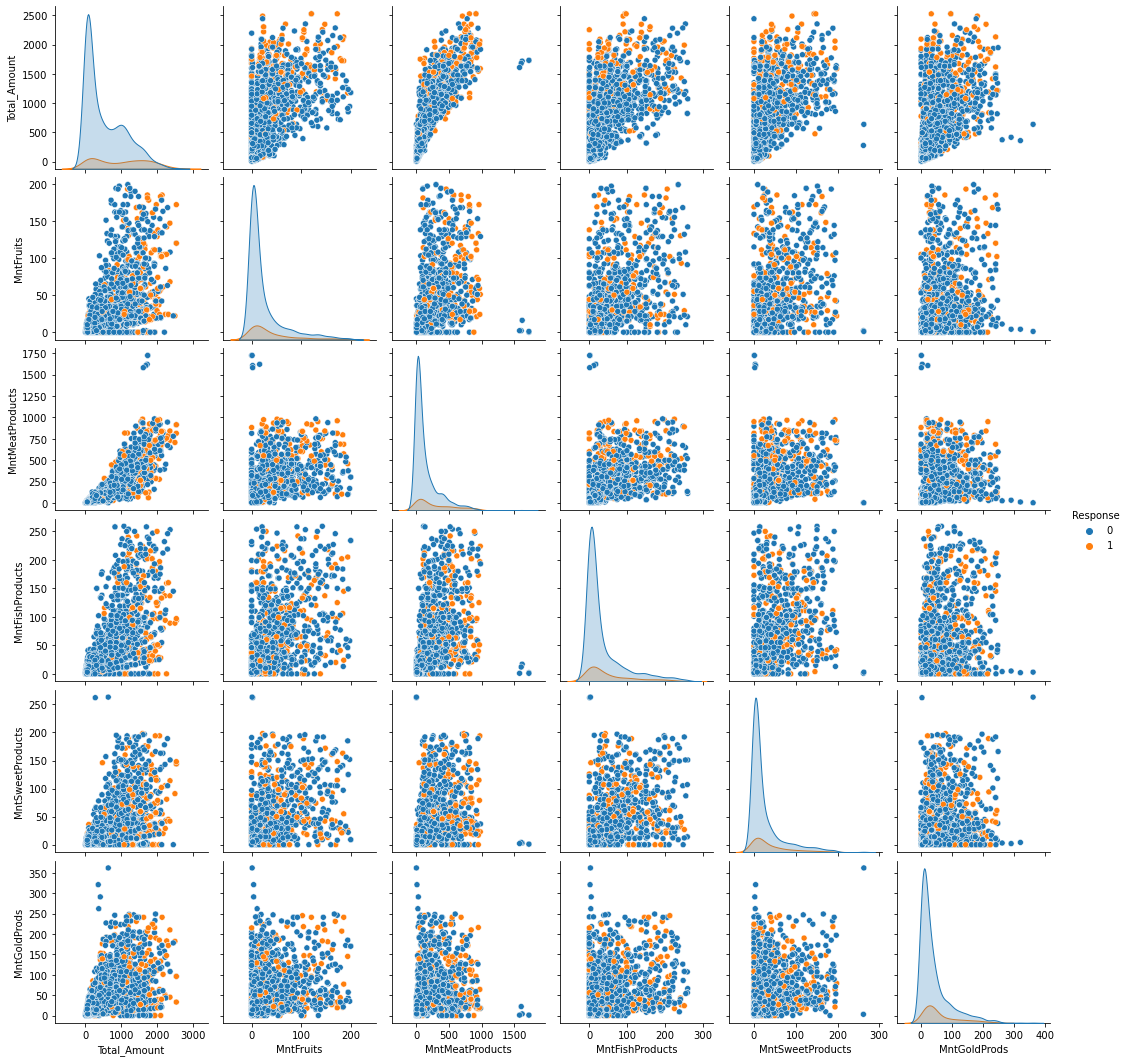

In [88]:
#Pairplot to various products and total amount with 'Response' as a hue parameter
sn.pairplot(df,vars = ['Total_Amount','MntFruits', 'MntMeatProducts', 'MntFishProducts',
                       'MntSweetProducts','MntGoldProds'],hue = 'Response')

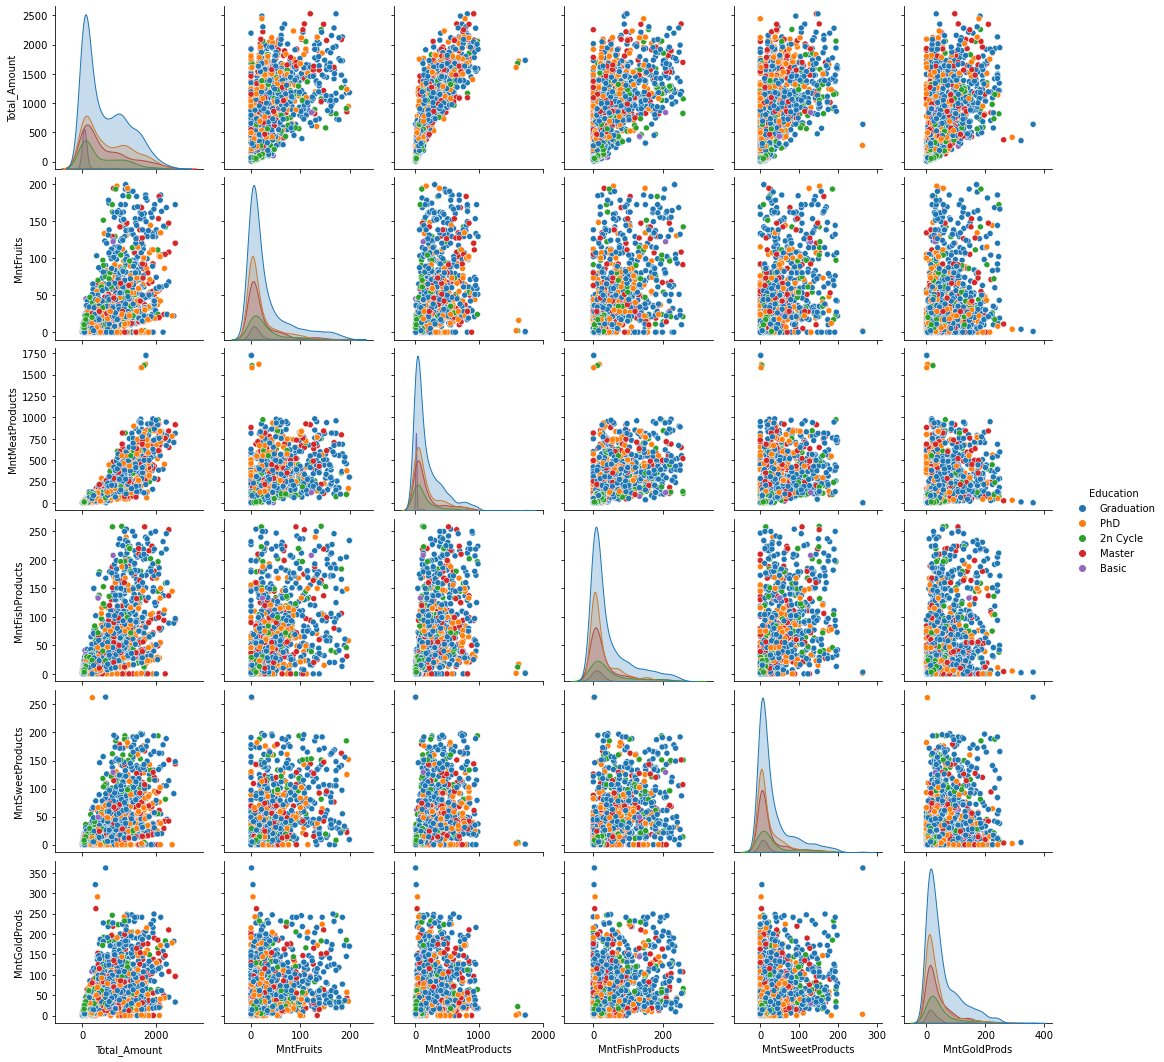

In [89]:
#Pairplot to various products and total amount with 'Education' as a hue parameter
sn.pairplot(df,vars = ['Total_Amount','MntFruits', 'MntMeatProducts', 'MntFishProducts',
                       'MntSweetProducts','MntGoldProds'],hue = 'Education')

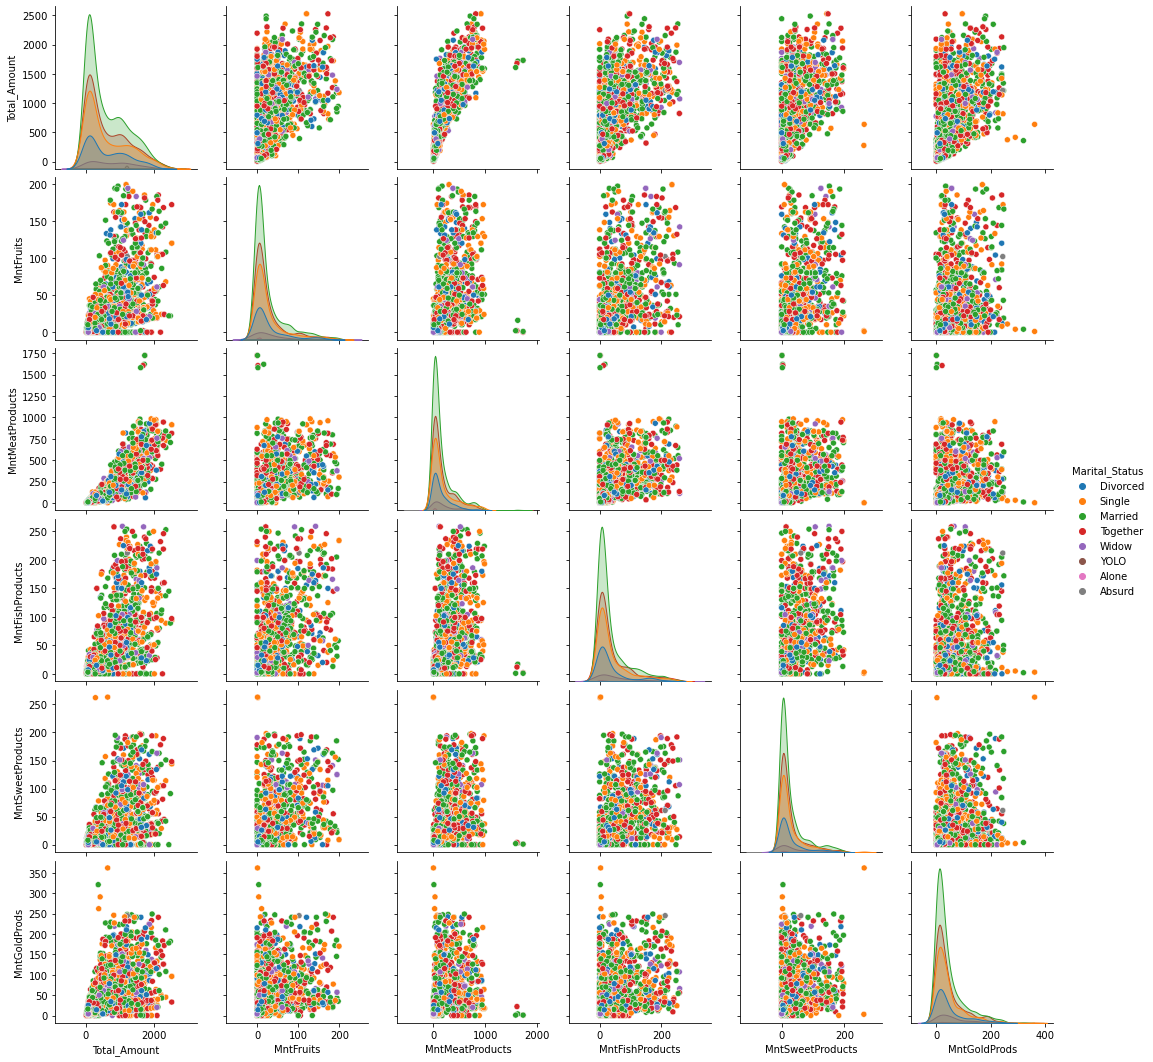

In [90]:
#Pairplot to various products and total amount with 'Marital_status' as a hue parameter
sn.pairplot(df,vars = ['Total_Amount','MntFruits', 'MntMeatProducts', 'MntFishProducts',
                       'MntSweetProducts','MntGoldProds'],hue = 'Marital_Status')

### Views
- There are more people who haven't respond for the last campaign.
- Total amount is linearly correlated to the various products
- More graduated customers spent more on various products. later phd holders spent more 
- Together and married peoples are spent more on various products. Their expenditure is positively correlated